# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#alcohol-names" data-toc-modified-id="alcohol-names-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>alcohol names</a></div><div class="lev1 toc-item"><a href="#Ulitsky" data-toc-modified-id="Ulitsky-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ulitsky</a></div><div class="lev1 toc-item"><a href="#Protein-PWMs" data-toc-modified-id="Protein-PWMs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Protein PWMs</a></div><div class="lev2 toc-item"><a href="#Weighted-differences" data-toc-modified-id="Weighted-differences-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Weighted differences</a></div><div class="lev2 toc-item"><a href="#Cleanup" data-toc-modified-id="Cleanup-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cleanup</a></div><div class="lev2 toc-item"><a href="#Ungrouped" data-toc-modified-id="Ungrouped-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Ungrouped</a></div><div class="lev1 toc-item"><a href="#paper-group-tables" data-toc-modified-id="paper-group-tables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>paper group tables</a></div><div class="lev1 toc-item"><a href="#Justification-for-5-communities:" data-toc-modified-id="Justification-for-5-communities:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Justification for 5 communities:</a></div><div class="lev1 toc-item"><a href="#Fixing-community-labels" data-toc-modified-id="Fixing-community-labels-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fixing community labels</a></div><div class="lev1 toc-item"><a href="#Splicing" data-toc-modified-id="Splicing-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Splicing</a></div><div class="lev2 toc-item"><a href="#Joining-tables" data-toc-modified-id="Joining-tables-91"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Joining tables</a></div><div class="lev2 toc-item"><a href="#FC-introns" data-toc-modified-id="FC-introns-92"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>FC introns</a></div><div class="lev2 toc-item"><a href="#Salmon-comparison" data-toc-modified-id="Salmon-comparison-93"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Salmon comparison</a></div><div class="lev1 toc-item"><a href="#Wetlab" data-toc-modified-id="Wetlab-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Wetlab</a></div><div class="lev1 toc-item"><a href="#Nature-figs" data-toc-modified-id="Nature-figs-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Nature figs</a></div><div class="lev2 toc-item"><a href="#tetris-boxplots" data-toc-modified-id="tetris-boxplots-111"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>tetris boxplots</a></div><div class="lev2 toc-item"><a href="#pwm-boxplot" data-toc-modified-id="pwm-boxplot-112"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>pwm boxplot</a></div><div class="lev3 toc-item"><a href="#p-value" data-toc-modified-id="p-value-1121"><span class="toc-item-num">11.2.1&nbsp;&nbsp;</span>p-value</a></div><div class="lev4 toc-item"><a href="#permutation-test" data-toc-modified-id="permutation-test-11211"><span class="toc-item-num">11.2.1.1&nbsp;&nbsp;</span>permutation test</a></div><div class="lev2 toc-item"><a href="#homolog-signals" data-toc-modified-id="homolog-signals-113"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>homolog signals</a></div><div class="lev2 toc-item"><a href="#tetris-frags" data-toc-modified-id="tetris-frags-114"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>tetris frags</a></div>

# Watermark

In [8]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Wed Jul 19 2017 

CPython 3.6.1
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
pandas 0.20.1
sklearn 0.18.1
matplotlib 2.0.2
seaborn 0.7.1
networkx 1.11
notebook 5.0.0
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.8.0-58-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [323]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from collections import defaultdict

from itertools import product
from itertools import count
from itertools import combinations

from os import listdir

from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import describe

import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display

/home/jessime/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Autoimport my code

In [12]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [13]:
cd ..

/home/jessime/Code/kmers3


In [14]:
%load_ext autoreload

In [15]:
autoreload 2

### Plotting

In [16]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.family'] = 'DejaVu Sans'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# alcohol names

Mauro wants to send Leon a featurecounts file with common gene names instead of ensembl identifiers. Also, I just got this email:

>Hi Mauro. Thanks so much!  Is there a way we can organize these by lncRNAs and mRNAs?

>Thanks,

>Leon

I'm going to take care of both of these at once. The first thing I'm going to do is build a dataframe of names from the fasta file.

In [174]:
infasta = '/home/jessime/Research/gencode.v26.transcripts.fa'
data = []

with open(infasta) as infasta:
    for line in infasta:
        if line[0] == '>':
            data.append(line.strip().strip('>').split('|')[:-1])

In [175]:
cols = ["ensembl",
        "ensembl_gene",
        "havana_gene",
        "havana",
        "common", 
        "common_gene",
        "length",
        "type"]
                    
full_names = pd.DataFrame(data=data, columns=cols)
full_names.head()

ensembl       ensembl_gene           havana_gene  \
0  ENST00000456328.2  ENSG00000223972.5  OTTHUMG00000000961.2   
1  ENST00000450305.2  ENSG00000223972.5  OTTHUMG00000000961.2   
2  ENST00000488147.1  ENSG00000227232.5  OTTHUMG00000000958.1   
3  ENST00000619216.1  ENSG00000278267.1                     -   
4  ENST00000473358.1  ENSG00000243485.5  OTTHUMG00000000959.2   

                 havana           common  common_gene length  \
0  OTTHUMT00000362751.1      DDX11L1-002      DDX11L1   1657   
1  OTTHUMT00000002844.2      DDX11L1-001      DDX11L1    632   
2  OTTHUMT00000002839.1       WASH7P-001       WASH7P   1351   
3                     -    MIR6859-1-201    MIR6859-1     68   
4  OTTHUMT00000002840.1  MIR1302-2HG-001  MIR1302-2HG    712   

                                 type  
0                processed_transcript  
1  transcribed_unprocessed_pseudogene  
2              unprocessed_pseudogene  
3                               miRNA  
4                             lincRNA

In [176]:
outfile = '/home/jessime/Research/v26_names_df.csv'
full_names.to_csv(outfile)

And repeat this for just the lncRNAs

In [177]:
infasta = '/home/jessime/Research/gencode.v26.lncRNA_transcripts.fa'
data = []

with open(infasta) as infasta:
    for line in infasta:
        if line[0] == '>':
            data.append(line.strip().strip('>').split('|')[:-1])
            
cols = ["ensembl",
        "ensembl_gene",
        "havana_gene",
        "havana",
        "common", 
        "common_gene",
        "length"]
                    
lncRNA_names = pd.DataFrame(data=data, columns=cols)
outfile = '/home/jessime/Research/v26_lncs_names_df.csv'
lncRNA_names.to_csv(outfile)
lncRNA_names.head()

ensembl       ensembl_gene           havana_gene  \
0  ENST00000473358.1  ENSG00000243485.5  OTTHUMG00000000959.2   
1  ENST00000469289.1  ENSG00000243485.5  OTTHUMG00000000959.2   
2  ENST00000417324.1  ENSG00000237613.2  OTTHUMG00000000960.1   
3  ENST00000461467.1  ENSG00000237613.2  OTTHUMG00000000960.1   
4  ENST00000466430.5  ENSG00000238009.6  OTTHUMG00000001096.2   

                 havana            common   common_gene length  
0  OTTHUMT00000002840.1   MIR1302-2HG-001   MIR1302-2HG    712  
1  OTTHUMT00000002841.2   MIR1302-2HG-002   MIR1302-2HG    535  
2  OTTHUMT00000002842.1       FAM138A-001       FAM138A   1187  
3  OTTHUMT00000002843.1       FAM138A-002       FAM138A    590  
4  OTTHUMT00000003225.1  RP11-34P13.7-001  RP11-34P13.7   2748

In [54]:
%aimport feature_counts

In [312]:
fc = '/home/jessime/Research/alcohol/fc_full.txt'
fc = feature_counts.FeatureCounts(fc)
print(fc.df.shape)
fc.df.head()

(58219, 15)


Geneid                                                Chr  \
0  ENSG00000223972.5       chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1   
1  ENSG00000227232.5  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
2  ENSG00000278267.1                                               chr1   
3  ENSG00000243485.5                           chr1;chr1;chr1;chr1;chr1   
4  ENSG00000284332.1                                               chr1   

                                               Start  \
0  11869;12010;12179;12613;12613;12975;13221;1322...   
1  14404;15005;15796;16607;16858;17233;17606;1791...   
2                                              17369   
3                      29554;30267;30564;30976;30976   
4                                              30366   

                                                 End                 Strand  \
0  12227;12057;12227;12721;12697;13052;13374;1440...      +;+;+;+;+;+;+;+;+   
1  14501;15038;15947;16765;17055;17368;17742;1806...  -;-;-;-;-;-;-;-;-;-;-   
2                                              17436                      -   
3                      30039;30667;30667;31097;31109              +;+;+;+;+   
4                                              30503                      +   

   Length  C1  C2  C3  E1  E2  E3  P1  P2  P3  
0    1735   0   0   1   0   0   0   0   0   0  
1    1351   4   5   7   7   8   6   5   4   7  
2      68   4   1   0   5   7   7   3   2   3  
3    1021   3   0   2   1   2   1   1   0   0  
4     138   0   0   0   0   0   0   0   0   0

In [313]:
to_join = full_names[['ensembl_gene', 'common_gene', 'type']]
to_join = to_join.rename(columns={'ensembl_gene':'Geneid'})
#I need to deduplicate. It should be fine to just groupby first.
to_join = to_join.groupby('Geneid').first()
to_join = to_join.reset_index()
print(to_join.shape)

df_common = pd.merge(fc.df, to_join, on='Geneid', how='left')
df_common['Geneid'] = df_common['common_gene']
del df_common['common_gene']
df_common = df_common.sort_values('type')
keep = ['lincRNA', 'protein_coding']

simple_type = []
unique_lncs = set(lncRNA_names['common_gene'].values)
for i, row in df_common.iterrows():
    if row['Geneid'] in unique_lncs:
        simple_type.append('lincRNA')
    elif row['type'] == 'protein_coding':
        simple_type.append('protein_coding')
    else:
        simple_type.append('other')
df_common['simple_type'] = simple_type

df_common.to_csv('/home/jessime/Research/alcohol/fc_full_sort.csv')
print(df_common.shape)
df_common.head()

(58219, 3)
(58219, 17)


Geneid                                  Chr  \
41537    RP11-761I4.4                          chr15;chr15   
1330          HYI-AS1                            chr1;chr1   
25616   RP11-299M14.2                            chr8;chr8   
50125  CTD-2540B15.13                                chr19   
49332    CTC-510F12.4  chr19;chr19;chr19;chr19;chr19;chr19   

                                                   Start  \
41537                                  81303215;81309331   
1330                                   43453927;43456578   
25616                                143833270;143833964   
50125                                           33207129   
49332  11300777;11300867;11306679;11306679;11321294;1...   

                                                     End       Strand  Length  \
41537                                  81303629;81309391          -;-     476   
1330                                   43454053;43456995          +;+     545   
25616                                143833485;143834063          -;-     316   
50125                                           33207639            +     511   
49332  11301236;11301236;11306824;11306824;11321323;1...  -;-;-;-;-;-     685   

       C1  C2  C3  E1  E2  E3  P1  P2  P3                      type  \
41537   3   4   0   0   2   3   3   3   3  3prime_overlapping_ncRNA   
1330    4   5   4   9   2   4   3   2   6  3prime_overlapping_ncRNA   
25616   0   0   2   0   0   0   2   1   1  3prime_overlapping_ncRNA   
50125   0   0   0   0   0   0   0   0   0  3prime_overlapping_ncRNA   
49332  16  11  11  13   7  18  16  11   7  3prime_overlapping_ncRNA   

      simple_type  
41537     lincRNA  
1330      lincRNA  
25616     lincRNA  
50125     lincRNA  
49332     lincRNA

In [194]:
fc = '/home/jessime/Research/alcohol/fc_full_norm.txt'
fc = feature_counts.FeatureCounts(fc)

to_join = full_names[['ensembl_gene', 'common_gene', 'type']]
to_join = to_join.rename(columns={'ensembl_gene':'Geneid'})
to_join = to_join.groupby('Geneid').first()
to_join = to_join.reset_index()

df_common = pd.merge(fc.df, to_join, on='Geneid')
df_common['Geneid'] = df_common['common_gene']
del df_common['common_gene']
df_common = df_common.sort_values('type')
keep = ['lincRNA', 'protein_coding']

simple_type = []
unique_lncs = set(lncRNA_names['common_gene'].values)
for i, row in df_common.iterrows():
    if row['Geneid'] in unique_lncs:
        simple_type.append('lincRNA')
    elif row['type'] == 'protein_coding':
        simple_type.append('protein_coding')
    else:
        simple_type.append('other')
df_common['simple_type'] = simple_type

df_common.to_csv('/home/jessime/Research/alcohol/fc_full_norm_sort.csv')
df_common.head()

Geneid                                  Chr  \
41537    RP11-761I4.4                          chr15;chr15   
1330          HYI-AS1                            chr1;chr1   
25616   RP11-299M14.2                            chr8;chr8   
50125  CTD-2540B15.13                                chr19   
49332    CTC-510F12.4  chr19;chr19;chr19;chr19;chr19;chr19   

                                                   Start  \
41537                                  81303215;81309331   
1330                                   43453927;43456578   
25616                                143833270;143833964   
50125                                           33207129   
49332  11300777;11300867;11306679;11306679;11321294;1...   

                                                     End       Strand  Length  \
41537                                  81303629;81309391          -;-     476   
1330                                   43454053;43456995          +;+     545   
25616                                143833485;143834063          -;-     316   
50125                                           33207639            +     511   
49332  11301236;11301236;11306824;11306824;11321323;1...  -;-;-;-;-;-     685   

             C1        C2        C3        E1        E2        E3        P1  \
41537  0.210614  0.340438  0.000000  0.000000  0.153374  0.238450  0.241682   
1330   0.245266  0.371670  0.268185  0.584473  0.133956  0.277681  0.211084   
25616  0.000000  0.000000  0.231267  0.000000  0.000000  0.000000  0.242702   
50125  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
49332  0.780554  0.650559  0.586777  0.671693  0.373024  0.994178  0.895694   

             P2        P3                      type simple_type  
41537  0.250471  0.271442  3prime_overlapping_ncRNA     lincRNA  
1330   0.145840  0.474151  3prime_overlapping_ncRNA     lincRNA  
25616  0.125764  0.136293  3prime_overlapping_ncRNA     lincRNA  
50125  0.000000  0.000000  3prime_overlapping_ncRNA     lincRNA  
49332  0.638183  0.440118  3prime_overlapping_ncRNA     lincRNA

In [195]:
print(fc.df.shape)
print(df_common.shape)

(58219, 15)
(58219, 17)


In [196]:
df_common['simple_type'].value_counts()

other             25767
protein_coding    16615
lincRNA           15837
Name: simple_type, dtype: int64

# Ulitsky

In [74]:
evolution_order = ['oc2', 'cf3', 'md5', 'gg4', 'ac2', 'lc1', 'dr7', 'ga1', 'ot2', 'cm1', 'sp4']

df = '/home/jessime/Research/ulitsky/xist_hottip2.csv'
df = pd.read_csv(df, index_col=0)
df = df.loc[evolution_order]
df

XIST group  XIST mean  XIST pvalue  HOTTIP group  HOTTIP mean  \
oc2          4   0.058324     0.000000             2    -0.002941   
cf3          3   0.058760     0.000000             2     0.056220   
md5          4   0.002430     1.000000             3     0.062099   
gg4          2   0.053596     0.000000             1     0.055476   
ac2          3   0.001786     1.000000             2     0.029390   
lc1       Null  -0.004040     1.000000             1     0.049013   
dr7       Null  -0.005467     1.000000             1     0.043102   
ga1          3   0.007460     1.000000             3    -0.008590   
ot2          5   0.025320     0.115861             1     0.052473   
cm1          2   0.039551     0.000000             1     0.044378   
sp4          2  -0.037576     1.000000             1     0.048325   

     HOTTIP pvalue  
oc2       1.000000  
cf3       0.000000  
md5       0.000000  
gg4       0.000000  
ac2       0.133833  
lc1       0.000000  
dr7       0.000000  
ga1       1.000000  
ot2       0.000000  
cm1       0.000000  
sp4       0.000000

In [50]:
df.to_csv('/home/jessime/Research/ulitsky/xist_hottip2.csv')

In [76]:
max(df.index.value_counts())

1

# Protein PWMs

I've got several emails on this subject. I'll collect them here.

> Hey Jessime on second thought I'd like to see what the protein motif stuff looks like before we resubmit. We can use the Hughes database. This is just list crosschecking so shouldn't take more than one day. Let's get together the motif logos for the proteins (I think there are six?) whose binding is enriched in at least one kmer community relative to the null and see if kmers enriched in the corresponding communities match the motif? We also want to know how many proteins with Hughes motifs do not show enriched binding in a kmer community. Everyone that has read the paper - us included- wants more out of the rbp section so we ought to push to get it together.


> Hey Jessime — I have everything in place to cross check representative kmers against motifs — just waiting on that list…
Some stats: of the 109 proteins that we have eCLIP data for, 79 are significantly associated with a community, and 48 have motifs that were either directly measured or inferred in the hughes database. The intersection between the 79 and 48: We have eCLIP data and binding specificity for 35 proteins that are significantly associated with a kmer community in HepG2 and K562. Pretty great numbers actually.
Mauro

> Hey Jessime
Let me know when you are back in town — for the motif content experiment, what I think we should do is write code that weights a motif/kmer match based on the score from the PWM (if one is defined for the RBP of interest). Then we compare weighted kmer ranks between communities that are enriched for protein binding to those that are not enriched. I am starting to think through the code for this now, but it turns out that it is very difficult to do work down here…only one coffee shop with wifi! Maybe we can both work on this. Attached is a list of the 22 rbp’s with motifs in the hughes database that show preferential association with at least one kmer community. IUPAC motifs are appended, but again, I think weighting the scores will give us a better chance of success here.
Mauro

>Hey Jessime,
First, we rank each kmer according to its average standardized abundance in each community, including the null community. The hypothesis is that the average rank of the motif-matching kmers for a given protein binding motif will be higher in the communities that preferentially associate with the protein of interest than the kmer’s average rank in the communities that are not significantly enriched in binding of the protein. 
For a protein like SFPQ with a 7 nucleotide motif, all 4096 kmers are represented in the PWM — which is why I suggest weighting each kmer by its multiplicative weight in the PWM, then multiplying that weight by the kmer’s rank, then taking the average rank of all of the kmers and comparing the average between the two groups of communities. 
Does that help?
Mauro

> Hey Jessime, maybe the best value for us to use for the enriched binding vs not enriched binding expeirment is the average kmer abundance rather than the rank of the kmer abundance. Go through an example or two and see what you think. My code is not pretty -- but when I did sfpq, I get an average weighted kmer abundance of 0.0317389775469136 and  -0.002001545286283 in the enriched vs not enriched communities respectively. That is a massive difference that is in super strong support of everything we have been working towards.

>The PWMs for the 22 proteins are attached — look through the file carefully because there are different formats for some proteins — I think for the motifs that are not PWMs. To generate this file, I went to the hughes database and put the 22 rbps in my “cart”, then just downloaded the info.
Mauro

> that is a great idea for the 5mer motif — lets do that, add 0.25’s to one end. For 7mer motif, I feel like the way to do it is to add two weighted scores together (not average them). That way you are not excluding any data and nor are you reducing the potency of a strongly matching kmer — the kmer is at this position AND that position and we treat each one according to its experimentally measured weight. To get the weighted score I am multiplying the PWM value for each nucleotide within the kmer. Any motif longer than 6, I just add the scores.

> For the proteins with more than one PWM — not sure. One way is to just add all the weights from all of the PWMs, just as if it were a 7mer motif; this may be the best approach. Another way might be to favor the motif data from the Hughes lab 2013 paper and un-favor PWMs calculated from SELEX or CLIP. I am of the mindset to ignore motifs from CLIP in either case — that way we are using an entirely tangential method from gene yeo’s clip data to predict protein binding potential.

In [47]:
infile = '/home/jessime/Research/proteins/PWM.txt'

with open(infile) as infile:
    data = infile.read()
    
data = data.split('\n'*3)
data = [d.split('\n') for d in data if 'Pos' in d]

outbase = '/home/jessime/Research/proteins/{}_{}_pwm.txt'
for i, pwm in enumerate(data):
    name = pwm[1].split()[-1]
    outfile = outbase.format(i, name)
    with open(outfile, 'w') as outfile:
        for l in pwm:
            outfile.write(l+'\n')

Let's play around with one.

There's almost certainly a fancy math trick to do this in one or two lines, but I don't know what it is.

In [92]:
pwm = '/home/jessime/Research/proteins/0_QKI_pwm.txt'
pwm = pd.read_csv(pwm, index_col=0, sep='\t', skiprows=6)
pwm

A         C         G         U
Pos                                        
1    0.824350  0.058550  0.058550  0.058550
2    0.014686  0.955943  0.014686  0.014686
3    0.014686  0.014686  0.014686  0.955943
4    0.955943  0.014686  0.014686  0.014686
5    0.955943  0.014686  0.014686  0.014686
6    0.014686  0.820842  0.014686  0.149786
7    0.411148  0.304972  0.173046  0.110834

In [132]:
def kmer_weight_df(pwm):
    pwm = pd.read_csv(pwm, index_col=0, sep='\t', skiprows=6)
    kmers = [''.join(i) for i in product('AGUC', repeat=6)]
    kmer_weights = defaultdict(float)

    for start in range(1, max(pwm.index)-4):
        for kmer in kmers:
            weights = [pwm.get_value(i+start, nuc) for i, nuc in enumerate(kmer)]
            weight = np.prod(np.array(weights))
            kmer_weights[kmer] += weight
    kmer_weights = pd.DataFrame.from_dict(kmer_weights, orient='index')
    kmer_weights.columns = ['weight']
    return kmer_weights

kmer_weights = kmer_weight_df('/home/jessime/Research/proteins/0_QKI_pwm.txt')
kmer_weights.head()

weight
AAAAAA  0.000004
AAAAAG  0.000003
AAAAAU  0.000025
AAAAAC  0.000134
AAAAGA  0.000001

In [134]:
kmer_weights.loc['ACUAAC']

weight    0.565065
Name: ACUAAC, dtype: float64

In [136]:
kmer_weights['weight'].argmax()

'ACUAAC'

Everything checks out here, and I've taken care longer than 6 kmer motifs. For the two shorter than 6 (2_NONO and 24_SRSF9), I'm going to manually add .25 rows to both sides.

Now I just have to sum up the multiple different motif files as I do all the proteins.

In [124]:
mkdir /home/jessime/Research/proteins/weights

In [137]:
df_dict = defaultdict(list)
folder = '/home/jessime/Research/proteins/'
for f in listdir(folder):
    if f in ('PWM.txt', 'weights'):
        continue
    protein = f.split('_')[1]
    full = folder+f
    df = kmer_weight_df(full)
    df_dict[protein].append(df)

In [139]:
lengths = [len(v) for v in df_dict.values()]
print(lengths)
print(sum(lengths))

[1, 9, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]
31


That means I've iterated properly.

Now I have to sum up all the weight dfs.

In [141]:
sum(df_dict['SRSF1']).head()

weight
AAAAAA  0.002180
AAAAAG  0.005981
AAAAAU  0.001615
AAAAAC  0.016028
AAAAGA  0.000898

Huh. I didn't expect that to work. 

In [143]:
for protein, df_ls in df_dict.items():
    total_df = sum(df_ls)
    outfile = f'/home/jessime/Research/proteins/weights/{protein}.csv'
    total_df.to_csv(outfile)

## Weighted differences

In [146]:
%aimport pearson

In [147]:
grouped_kmers = '/home/jessime/Research/v22_groups_6mer_means.csv'
grouped_kmers = pd.read_csv(grouped_kmers, index_col=0).T
grouped_kmers.head()

Group          0         1         2         3         4         5
AAAAAA  0.203690 -0.278704 -0.156233 -0.040869  1.208915 -0.094515
AAAAAG  0.266814 -0.339786 -0.249845 -0.158246  0.391183  0.016910
AAAAAT  0.547213 -0.437577 -0.334426 -0.159653  1.015170 -0.116580
AAAAAC  0.278565 -0.304142 -0.223432 -0.122164  0.256384  0.005990
AAAAGA  0.244921 -0.358703 -0.248021 -0.156271  0.174782  0.052433

In [158]:
test_protein = '/home/jessime/Research/proteins/weights/SFPQ.csv'
test_protein = pd.read_csv(test_protein, index_col=0)
test_protein.index = test_protein.index.str.replace('U', 'T')
test_protein.head()

weight
AAAAAA  0.000004
AAAAAG  0.000031
AAAAAT  0.000025
AAAAAC  0.000004
AAAAGA  0.000027

In [162]:
grouped_kmers_weighted = grouped_kmers.copy()
grouped_kmers_weighted = grouped_kmers_weighted.multiply(test_protein['weight'], axis='index')
grouped_kmers_weighted.head()

Group              0             1             2             3             4  \
AAAAAA  7.298799e-07 -9.986751e-07 -5.598275e-07 -1.464457e-07  4.331889e-06   
AAAAAG  8.220642e-06 -1.046895e-05 -7.697824e-06 -4.875608e-06  1.205250e-05   
AAAAAT  1.392402e-05 -1.113431e-05 -8.509581e-06 -4.062434e-06  2.583137e-05   
AAAAAC  9.981771e-07 -1.089827e-06 -8.006221e-07 -4.377502e-07  9.186984e-07   
AAAAGA  6.538527e-06 -9.576118e-06 -6.621286e-06 -4.171890e-06  4.666081e-06   

Group              5  
AAAAAA -3.386730e-07  
AAAAAG  5.210091e-07  
AAAAAT -2.966421e-06  
AAAAAC  2.146495e-08  
AAAAGA  1.399784e-06

In [163]:
grouped_kmers_weighted.sum()

Group
0    0.163447
1   -0.099969
2   -0.148922
3    0.075484
4    0.095026
5   -0.029594
dtype: float64

This doesn't seem to agree with what Mauro is getting, but let's run it and save.

In [164]:
!mkdir /home/jessime/Research/proteins/grouped_weights

In [165]:
!mkdir /home/jessime/Research/proteins/grouped_sums

In [168]:
infolder = '/home/jessime/Research/proteins/weights/'
outfolder1 = '/home/jessime/Research/proteins/grouped_weights/'
outfolder2 = '/home/jessime/Research/proteins/grouped_sums/'

for f in listdir(infolder):
    weights = infolder+f
    weights = pd.read_csv(weights, index_col=0)
    weights.index = test_protein.index.str.replace('U', 'T')
    grouped_kmers_weighted = grouped_kmers.copy()
    grouped_kmers_weighted = grouped_kmers_weighted.multiply(weights['weight'], axis='index')
    grouped_kmers_weighted.to_csv(outfolder1+f)
    totals = grouped_kmers_weighted.sum()
    totals.to_csv(outfolder2+f)

## Cleanup

I'm trying to rewrite and make sure everything I've done is correct and provable.

In [207]:
!mkdir /home/jessime/Research/proteins/weights2 \
/home/jessime/Research/proteins/grouped_sums2 \
/home/jessime/Research/proteins/grouped_weights2\

Let's get a list of proteins.

In [211]:
indir = '/home/jessime/Research/proteins/'
proteins = list(set(f.split('_')[1] for f in listdir(indir) if 'pwm' in f))
print(proteins)

['SRSF9', 'KHDRBS1', 'HNRNPC', 'SRSF1', 'hnRNPK', 'QKI', 'NONO', 'PTBP1', 'TIA1', 'IGF2BP1', 'SFPQ', 'IGF2BP2', 'PCBP2', 'FXR2', 'IGF2BP3', 'HNRNPA1', 'FXR1']


In [210]:
%aimport pwm_motifs

In [224]:
def pwm2df_by_protein(protein):
    indir = '/home/jessime/Research/proteins/'
    pwm_ls = [indir+f for f in listdir(indir) if protein in f]
    group_kmers = '/home/jessime/Research/v22_groups_6mer_means.csv'
    outweights = indir+'weights2/'+f'{protein}.csv'
    outgroups = indir+'grouped_weights2/'+f'{protein}.csv'
    outsums = indir+'grouped_sums2/'+f'{protein}.csv'

    mw = pwm_motifs.MotifWeighter(pwm_ls, group_kmers, outweights, outgroups, outsums)
    mw.pwm2weighted_kmers()

In [234]:
for p in proteins:
    pwm2df_by_protein(p)

## Ungrouped

Mauro isn't grouping his weights. For comparison, let's do it that way.

In [235]:
!mkdir /home/jessime/Research/proteins/weights3 \
/home/jessime/Research/proteins/grouped_sums3 \
/home/jessime/Research/proteins/grouped_weights3 \

Also, I'm going to move the code to get the communities per protein out here. It's ugly and I want to have a pickle of the dictionary.

In [273]:
comms = '/home/jessime/Research/proteins/full_precision_recall2.xlsx'
comms = pd.read_excel(comms, index_col=0)
protein_communities_dict = defaultdict(set)
for i, row in comms.iterrows():
    if isinstance(row['Community'], str):
        protein_communities_dict[row['Protein']].update(set(eval(row['Community'])))
outfile = '/home/jessime/Research/proteins/protein_comm_dict.txt'
pickle.dump(protein_communities_dict, open(outfile, 'wb'))

In [277]:
def pwm2df_individual(infile):
    indir = '/home/jessime/Research/proteins/'
    pwm_ls = [indir+infile]
    out = infile[:-8]
    protein = infile.split('_')[1]
    group_kmers = '/home/jessime/Research/v22_groups_6mer_means.csv'
    comms = '/home/jessime/Research/proteins/protein_comm_dict.txt'
    outweights = indir+'weights3/'+f'{out}.csv'
    outgroups = indir+'grouped_weights3/'+f'{out}.csv'
    outsums = indir+'grouped_sums3/'+f'{out}.csv'

    mw = pwm_motifs.MotifWeighter(pwm_ls, group_kmers, protein, comms, outweights, outgroups, outsums)
    mw.pwm2weighted_kmers()

In [284]:
for f in listdir('/home/jessime/Research/proteins/'):
    if 'pwm.txt' in f:
        pwm2df_individual(f)

# paper group tables

Just need to convert names to paper names.

In [286]:
name_map = {0:'1',
            1:'2',
            2:'3',
            3:'4',
            4:'5',
            5:'Null'}

In [198]:
v22_groups = '/home/jessime/Research/groups.csv'
v22_groups = pd.read_csv(v22_groups, index_col=0)
v22_groups = v22_groups.replace({'Group':name_map})
v22_groups.to_csv('/home/jessime/Research/groups_paper.csv')
v22_groups.head()

Group
RP11-34P13.3-001     3
FAM138A-001       Null
RP11-34P13.7-001  Null
RP11-34P13.7-201  Null
RP11-34P13.8-001  Null

In [199]:
M5_groups = '/home/jessime/Research/groups_M5.csv'
M5_groups = pd.read_csv(M5_groups, index_col=0)
M5_groups = M5_groups.replace({'Group':name_map})
M5_groups.to_csv('/home/jessime/Research/groups_M5_paper.csv')
M5_groups.head()

Group
4933401J01Rik-001     1
Gm37180-001           1
Gm37363-001           1
Gm37686-001           1
Gm1992-001         Null

In [200]:
v22_groups['Group'].value_counts()

Null    7527
1       3020
2       2012
3       1520
4       1097
5        777
Name: Group, dtype: int64

# Justification for 5 communities:

Here are the group sizes produced from December 2016:

In [201]:
group_sizes = [3020, 2012, 1520, 1097, 777, 203, 184, 121, 87, 82, 19, 16, 13, 10, 10]

Let's look at the fold differences between the groups.

In [205]:
fold_change = [group_sizes[i]/group_sizes[i+1] for i in range(len(group_sizes)-1)]
for i, fc in enumerate(fold_change):
    print(f'{i+1}-{i+2}: {fc:.2f}')

1-2: 1.50
2-3: 1.32
3-4: 1.39
4-5: 1.41
5-6: 3.83
6-7: 1.10
7-8: 1.52
8-9: 1.39
9-10: 1.06
10-11: 4.32
11-12: 1.19
12-13: 1.23
13-14: 1.30
14-15: 1.00


# Fixing community labels

We have two issues with some excel files. First, I need to switch the community labels from 0-indexed to 1-index. Then, I need to fix the incorrect labels on the pro_model_sig file.

In [292]:
comms = '/home/jessime/Research/proteins/Mauro/protein_full_precision_recall2.xlsx'
comms = pd.read_excel(comms, index_col=0)
protein_communities = []
for i, row in comms.iterrows():
    if isinstance(row['Community'], str):
        comm_ls = eval(row['Community'])
        comm_str = ','.join([name_map[c] for c in comm_ls])
        protein_communities.append(comm_str)
    else:
        protein_communities.append('')

In [294]:
comms['Community'] = protein_communities
comms.tail()

Protein Cell Type Community  Precision_Null  Recall_Null  Precision_Full  \
29     XRN2     HepG2     2,3,5        0.341695     0.645327        0.358229   
126    YBX3      K562                  0.471612     0.717742        0.479600   
81    YWHAG      K562         2        0.194469     0.683386        0.200358   
133  ZNF622      K562                  0.428468     0.657428        0.432000   
115  ZRANB2      K562         2        0.202575     0.672365        0.206390   

     Recall_Full  Precision_Diff  Recall_Diff  PR_Diff_Avg  
29      0.693982        0.016534     0.048656     0.032595  
126     0.717742        0.007987     0.000000     0.003994  
81      0.702194        0.005889     0.018809     0.012349  
133     0.658537        0.003532     0.001109     0.002320  
115     0.680912        0.003815     0.008547     0.006181

Conversion's good. I can save and pass over the new community info to pro_model_sig.

In [295]:
comms_out = '/home/jessime/Research/proteins/Mauro/protein_full_precision_recall3.xlsx'
comms.to_excel(comms_out)

In [298]:
pro_model_sig = '/home/jessime/Research/proteins/Mauro/pro_model_sig.xlsx'
pro_model_sig = pd.read_excel(pro_model_sig)
pro_model_sig.head()

Protein Cell Type  Adjusted p-value   Sig Communities
0   AGGF1     HepG2      5.436325e-04  True      [1, 2]
1     AUH     HepG2      6.511438e-06  True      [0, 4]
2   BCCIP     HepG2      1.338286e-15  True      [1, 2]
3   BUD13     HepG2      4.023666e-10  True      [1, 2]
4   CDC40     HepG2      5.605823e-06  True      [1, 2]

In [303]:
print(len(comms))
print(len(pro_model_sig))

156
156


In [308]:
comms_transfer = comms[['Protein', 'Cell Type', 'Community']]
pro_model_sig2 = pd.merge(pro_model_sig, comms_transfer, on=['Protein', 'Cell Type'])
del pro_model_sig2['Communities']
pro_model_sig2.head()

Protein Cell Type  Adjusted p-value   Sig Community
0   AGGF1     HepG2      5.436325e-04  True          
1     AUH     HepG2      6.511438e-06  True         2
2   BCCIP     HepG2      1.338286e-15  True     2,3,5
3   BUD13     HepG2      4.023666e-10  True          
4   CDC40     HepG2      5.605823e-06  True       2,5

I'm going to save this and verify there.

In [309]:
pro_model_sig_out = '/home/jessime/Research/proteins/Mauro/pro_model_sig2.xlsx'
pro_model_sig2.to_excel(pro_model_sig_out)

In [311]:
pro_model_sig2.Sig.dtype

dtype('bool')

# Splicing

Switching back to splicing again. 

One thing I haven't quite gotten used to is the 256GB limit on my SSD. So I'm storing some of the bigger files on /proj for now. I should be able to use the old HDD as external storage in a bit, but I haven't really set that up yet. 

But I'll log what I do here.

```bash

cd /proj/calabrlb/users/Jessime/rsync/Research

cat v26_transcripts01.fa v26_unspliced01.fa v26_pc001.fa v26_pc001_unspliced.fa > /pine/scr/j/e/jessime/splicing/v26_combo1.fa

```

Okay, so it turns out that using STAR isn't quite as easy as is seems. You need to run with `--quantMode TranscriptomeSAM` so that you get alignments to the transcriptome in addition to the genome. In order to do that, I need a GTF file that specifically has the unspliced version included.

The full GTF is huge, so I'm playing around with a subset for now. 

In [9]:
%aimport gtf

In [21]:
class A:
    
    def __init__(self, b):
        pass
    

In [43]:
class UnsplicedMaker(gtf.Maker):
    
    def __init__(self, inGTF=None, outGTF=None, skiprows=None):
        super().__init__(inGTF=inGTF, outGTF=outGTF, skiprows=skiprows)
        self.new_gtf = None
        self.counter = count()
        self.n = 0
        
    def gene_id(self, row):
        return row.attribute.split(';')[0].split()[1].strip('\"')
    
    def compare_genes(self, row, next_row):
        row_id = self.gene_id(row)
        next_id = self.gene_id(next_row)
        return row_id == next_id
    
    def check_unspliced(self, i, row):
        past = 0
        unspliced_included = False
        
        while True:
            past += 1
            if (i+past) not in self.inGTF.index:
                break
            next_row = self.inGTF.iloc[i+past]
            same_genes = self.compare_genes(row, next_row)
            if not same_genes:
                break
            conditions = (next_row['feature'] == 'exon',
                          next_row['start'] == row['start'],
                          next_row['end'] == row['end']
                          )
            if all(conditions):
                unspliced_included = True
                break

        return unspliced_included
    
    def building_base(self, row):
        attr = row['attribute'].split('; ')
        new = [attr[0]]
        new.append(f'transcript_id "UNSPLICED{self.n}"')
        new.append(attr[1])
        new.append(attr[2])
        new.append('transcript_type "unspliced"')
        name = attr[2].split()[1].strip('\"') + '-un'
        new.append(f'transcript_name "{name}"')
        return attr, new
    
    def build_transcript_attr(self, row):
        self.n = next(self.counter)
        attr, new = self.building_base(row)
        new.append(attr[3])
        new.append('transcript_support_level "N/A"')
        new = '; '.join(new)
        return new
    
    def build_exon_attr(self, row):
        attr, new = self.building_base(row)
        new.append('exon_number 0')
        new.append(f'exon_id "EXON{self.n}"')
        new = '; '.join(new)
        return new

    def insert_unspliced(self, row):
        new_transcript = row.copy()
        new_transcript['feature'] = 'transcript'
        new_transcript['attribute'] = self.build_transcript_attr(row)
        self.new_gtf.append(new_transcript)
        
        new_exon = row.copy()
        new_exon['feature'] = 'exon'
        new_exon['attribute'] = self.build_exon_attr(row)
        self.new_gtf.append(new_exon)
        
    def run(self):
        self.new_gtf = []
        
        for i, row in tqdm_notebook(self.inGTF.iterrows()):
            self.new_gtf.append(row)
            if row['feature'] == 'gene':
                unspliced_included = self.check_unspliced(i, row)     
                if not unspliced_included:
                    self.insert_unspliced(row)
        self.new_gtf = pd.DataFrame(data=self.new_gtf, 
                                    index=range(len(self.new_gtf)))
        self.save(self.new_gtf)

In [44]:
inGTF = '/home/jessime/Desktop/v26_head1000.gtf'
outGTF = '/home/jessime/Desktop/v26_head1000_unspliced.gtf'
maker = UnsplicedMaker(inGTF, outGTF, skiprows=5)
maker.inGTF.head()

seqname  source     feature  start    end score strand frame  \
0    chr1  HAVANA        gene  11869  14409     .      +     .   
1    chr1  HAVANA  transcript  11869  14409     .      +     .   
2    chr1  HAVANA        exon  11869  12227     .      +     .   
3    chr1  HAVANA        exon  12613  12721     .      +     .   
4    chr1  HAVANA        exon  13221  14409     .      +     .   

                                           attribute  
0  gene_id "ENSG00000223972.5"; gene_type "transc...  
1  gene_id "ENSG00000223972.5"; transcript_id "EN...  
2  gene_id "ENSG00000223972.5"; transcript_id "EN...  
3  gene_id "ENSG00000223972.5"; transcript_id "EN...  
4  gene_id "ENSG00000223972.5"; transcript_id "EN...

In [91]:
maker.run()
maker.new_gtf.head()

seqname  source     feature  start    end score strand frame  \
0    chr1  HAVANA        gene  11869  14409     .      +     .   
1    chr1  HAVANA  transcript  11869  14409     .      +     .   
2    chr1  HAVANA        exon  11869  14409     .      +     .   
3    chr1  HAVANA  transcript  11869  14409     .      +     .   
4    chr1  HAVANA        exon  11869  12227     .      +     .   

                                           attribute  
0  gene_id "ENSG00000223972.5"; gene_type "transc...  
1  gene_id "ENSG00000223972.5"; transcript_id "UN...  
2  gene_id "ENSG00000223972.5"; transcript_id "UN...  
3  gene_id "ENSG00000223972.5"; transcript_id "EN...  
4  gene_id "ENSG00000223972.5"; transcript_id "EN...

In [45]:
inGTF = '/home/jessime/Research/gencode.v26.annotation.gtf'
outGTF = '/home/jessime/Research/v26_full_unspliced.gtf'
maker = UnsplicedMaker(inGTF, outGTF, skiprows=5)
maker.run()

I put the unspliced gtf on longleaf and did:

```bash
module load cufflinks
module load salmon

#gtf2fasta.sh
gffread -w v22_full_unspliced.fa -g /proj/seq/data/STAR_genomes/GRCh38_p10_GENCODE/GRCh38.p10.genome.fa v26_full_unspliced.gtf 

#star_HepG2.sh
STAR --sjdbGTFfile /pine/scr/j/e/jessime/v26_full_unspliced.gtf --quantMode TranscriptomeSAM --genomeDir /proj/seq/data/STAR_genomes/GRCh38_p10_GENCODE --readFilesIn ENCFF713MNU.fastq.gz,ENCFF936SLY.fastq.gz ENCFF478DZZ.fastq.gz,ENCFF446UEC.fastq.gz --outSAMtype BAM Unsorted --runThreadN 4 --readFilesCommand zcat

#salmon_HepG2.sh
salmon quant --numBootstraps 30 -l A -t ../v26_full_unspliced.fa -a Aligned.toTranscriptome.out.bam -o salmon_HepG2

python2 ConvertBootstrapsToTSV.py ./ ./
```

I need to convert the ensemble id's into common names. I previously didn't have a good way of doing that for all of the transcripts (just ones I had fasta files for), so I can now extract names straight from the gtf file.

In [57]:
%aimport gtf

In [58]:
inGTF = '/home/jessime/Research/v26_full_unspliced.gtf'
#outfile = '/home/jessime/Research/v26_full_unspliced_id2name.csv'
extracter = gtf.Extracter(inGTF)
name_df = extracter.transcripts_id2name()
name_df.head()

gene_id       common
UNSPLICED0         ENSG00000223972.5   DDX11L1-un
ENST00000456328.2  ENSG00000223972.5  DDX11L1-002
ENST00000450305.2  ENSG00000223972.5  DDX11L1-001
UNSPLICED1         ENSG00000227232.5    WASH7P-un
ENST00000488147.1  ENSG00000227232.5   WASH7P-001

This is a pretty hacky way of doing this, but I need a binary array that says whether or not a transcript is unspliced. I'm just going to loop through the file instead of reading it into a dataframe.

First, let's test how many transcripts there should be in this file.

In [59]:
inGTF = '/home/jessime/Research/v26_full_unspliced.gtf'

with open(inGTF) as inGTF:
    print(sum(1 for l in inGTF if l.split('\t')[2] == 'transcript'))

234537


In [60]:
inGTF = '/home/jessime/Research/v26_full_unspliced.gtf'

with open(inGTF) as inGTF:
    previous_was_transcript = False
    gene_start_stop = None
    t_start_stop = None
    unspliced_labels = []
    
    for i, line in tqdm_notebook(enumerate(inGTF)):
        line_ls = line.split('\t')
        if line_ls[2] == 'gene':
            gene_start_stop = (line_ls[3], line_ls[4])
        elif line_ls[2] == 'transcript':
            t_start_stop = (line_ls[3], line_ls[4])
            previous_was_transcript = True
        elif previous_was_transcript:
            if line_ls[2] == 'exon':
                exon = (line_ls[3], line_ls[4])
                g_match = gene_start_stop == exon
                t_match = t_start_stop == exon
                unspliced_labels.append(g_match and t_match)
                previous_was_transcript = False

In [61]:
print(len(name_df))
print(len(unspliced_labels))
print(sum(unspliced_labels))

234537
234537
58220


In [62]:
name_df2 = name_df.copy()
name_df2['unspliced'] = unspliced_labels
name_df2.head()

gene_id       common  unspliced
UNSPLICED0         ENSG00000223972.5   DDX11L1-un       True
ENST00000456328.2  ENSG00000223972.5  DDX11L1-002      False
ENST00000450305.2  ENSG00000223972.5  DDX11L1-001      False
UNSPLICED1         ENSG00000227232.5    WASH7P-un       True
ENST00000488147.1  ENSG00000227232.5   WASH7P-001      False

In [63]:
outfile = '/home/jessime/Research/v26_full_unspliced_id2name.csv'
name_df2.to_csv(outfile)

## Joining tables

In [65]:
%aimport feature_counts

In [66]:
labels = '/home/jessime/Research/v26_full_unspliced_id2name.csv'
labels = pd.read_csv(labels, index_col=0)
print(labels.shape)
labels.head()

(234537, 3)


gene_id       common  unspliced
UNSPLICED0         ENSG00000223972.5   DDX11L1-un       True
ENST00000456328.2  ENSG00000223972.5  DDX11L1-002      False
ENST00000450305.2  ENSG00000223972.5  DDX11L1-001      False
UNSPLICED1         ENSG00000227232.5    WASH7P-un       True
ENST00000488147.1  ENSG00000227232.5   WASH7P-001      False

In [67]:
salmon_HepG2 = '/home/jessime/Research/splicing/salmon_HepG2.txt'
salmon_HepG2 = pd.read_csv(salmon_HepG2, index_col=0, sep='\t')
print(salmon_HepG2.shape)
salmon_HepG2.head()

(234537, 4)


Length  EffectiveLength       TPM  NumReads
Name                                                          
UNSPLICED0           2541         2361.970  0.000000     0.000
ENST00000456328.2    1657         1477.970  0.174127    23.042
ENST00000450305.2     632          460.923  0.000000     0.000
UNSPLICED1          15167        14988.000  1.266110  1699.030
ENST00000488147.1    1351         1171.970  1.165560   122.304

In [68]:
salmon_HepG2 = labels.join(salmon_HepG2)
print(salmon_HepG2.shape)
salmon_HepG2.head()

(234537, 7)


gene_id       common  unspliced  Length  \
UNSPLICED0         ENSG00000223972.5   DDX11L1-un       True    2541   
ENST00000456328.2  ENSG00000223972.5  DDX11L1-002      False    1657   
ENST00000450305.2  ENSG00000223972.5  DDX11L1-001      False     632   
UNSPLICED1         ENSG00000227232.5    WASH7P-un       True   15167   
ENST00000488147.1  ENSG00000227232.5   WASH7P-001      False    1351   

                   EffectiveLength       TPM  NumReads  
UNSPLICED0                2361.970  0.000000     0.000  
ENST00000456328.2         1477.970  0.174127    23.042  
ENST00000450305.2          460.923  0.000000     0.000  
UNSPLICED1               14988.000  1.266110  1699.030  
ENST00000488147.1         1171.970  1.165560   122.304

In [69]:
outfile = '/home/jessime/Research/splicing/salmon_HepG2_labeled.csv'
salmon_HepG2.to_csv(outfile)

In [70]:
fc_HepG2 = '/home/jessime/Research/splicing/fc_HepG2.txt'
fc_HepG2 = feature_counts.FeatureCounts(fc_HepG2)
fc_HepG2.df.set_index('Geneid', inplace=True)
fc_HepG2.df.head()

Chr  \
Geneid                                                                 
UNSPLICED0                                                      chr1   
ENST00000456328.2                                     chr1;chr1;chr1   
ENST00000450305.2                      chr1;chr1;chr1;chr1;chr1;chr1   
UNSPLICED1                                                      chr1   
ENST00000488147.1  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                                               Start  \
Geneid                                                                 
UNSPLICED0                                                     11869   
ENST00000456328.2                                  11869;12613;13221   
ENST00000450305.2                12010;12179;12613;12975;13221;13453   
UNSPLICED1                                                     14404   
ENST00000488147.1  14404;15005;15796;16607;16858;17233;17606;1791...   

                                                                 End  \
Geneid                                                                 
UNSPLICED0                                                     14409   
ENST00000456328.2                                  12227;12721;14409   
ENST00000450305.2                12057;12227;12697;13052;13374;13670   
UNSPLICED1                                                     29570   
ENST00000488147.1  14501;15038;15947;16765;17055;17368;17742;1806...   

                                  Strand  Length  Aligned.out.bam  
Geneid                                                             
UNSPLICED0                             +    2541                0  
ENST00000456328.2                  +;+;+    1657                0  
ENST00000450305.2            +;+;+;+;+;+     632                0  
UNSPLICED1                             -   15167              189  
ENST00000488147.1  -;-;-;-;-;-;-;-;-;-;-    1351               28

In [71]:
fc_HepG2 = labels.join(fc_HepG2.df)
print(fc_HepG2.shape)
outfile = '/home/jessime/Research/splicing/fc_HepG2_labeled.csv'
fc_HepG2.to_csv(outfile)
fc_HepG2.head()

(234537, 9)


gene_id       common  unspliced  \
UNSPLICED0         ENSG00000223972.5   DDX11L1-un       True   
ENST00000456328.2  ENSG00000223972.5  DDX11L1-002      False   
ENST00000450305.2  ENSG00000223972.5  DDX11L1-001      False   
UNSPLICED1         ENSG00000227232.5    WASH7P-un       True   
ENST00000488147.1  ENSG00000227232.5   WASH7P-001      False   

                                                                 Chr  \
UNSPLICED0                                                      chr1   
ENST00000456328.2                                     chr1;chr1;chr1   
ENST00000450305.2                      chr1;chr1;chr1;chr1;chr1;chr1   
UNSPLICED1                                                      chr1   
ENST00000488147.1  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                                               Start  \
UNSPLICED0                                                     11869   
ENST00000456328.2                                  11869;12613;13221   
ENST00000450305.2                12010;12179;12613;12975;13221;13453   
UNSPLICED1                                                     14404   
ENST00000488147.1  14404;15005;15796;16607;16858;17233;17606;1791...   

                                                                 End  \
UNSPLICED0                                                     14409   
ENST00000456328.2                                  12227;12721;14409   
ENST00000450305.2                12057;12227;12697;13052;13374;13670   
UNSPLICED1                                                     29570   
ENST00000488147.1  14501;15038;15947;16765;17055;17368;17742;1806...   

                                  Strand  Length  Aligned.out.bam  
UNSPLICED0                             +    2541                0  
ENST00000456328.2                  +;+;+    1657                0  
ENST00000450305.2            +;+;+;+;+;+     632                0  
UNSPLICED1                             -   15167              189  
ENST00000488147.1  -;-;-;-;-;-;-;-;-;-;-    1351               28

## FC introns

I want to know how many of the reads in the unspliced transcript are coming from the introns in the FeatureCounts. This might be a bit of gymnastics, but it should be doable to subtract the total number of reads in the unspliced from the predominant isoform. 

Unless I'm forgetting about something, that should be an appropriate way of doing the calculation.

The first thing I have to do is filter for only the unspliced and -01 versions of transcripts.

In [72]:
infile = '/home/jessime/Research/splicing/fc_HepG2_labeled.csv'
fc_HepG2 = pd.read_csv(infile, index_col=0)

unspliced = fc_HepG2['unspliced']
main = fc_HepG2['common'].str.endswith('01')
unspliced_main = fc_HepG2[unspliced|main]
print(unspliced_main.shape)
unspliced_main.head()

(98842, 9)


gene_id         common  unspliced  \
UNSPLICED0         ENSG00000223972.5     DDX11L1-un       True   
ENST00000450305.2  ENSG00000223972.5    DDX11L1-001      False   
UNSPLICED1         ENSG00000227232.5      WASH7P-un       True   
ENST00000488147.1  ENSG00000227232.5     WASH7P-001      False   
ENST00000619216.1  ENSG00000278267.1  MIR6859-1-201       True   

                                                                 Chr  \
UNSPLICED0                                                      chr1   
ENST00000450305.2                      chr1;chr1;chr1;chr1;chr1;chr1   
UNSPLICED1                                                      chr1   
ENST00000488147.1  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
ENST00000619216.1                                               chr1   

                                                               Start  \
UNSPLICED0                                                     11869   
ENST00000450305.2                12010;12179;12613;12975;13221;13453   
UNSPLICED1                                                     14404   
ENST00000488147.1  14404;15005;15796;16607;16858;17233;17606;1791...   
ENST00000619216.1                                              17369   

                                                                 End  \
UNSPLICED0                                                     14409   
ENST00000450305.2                12057;12227;12697;13052;13374;13670   
UNSPLICED1                                                     29570   
ENST00000488147.1  14501;15038;15947;16765;17055;17368;17742;1806...   
ENST00000619216.1                                              17436   

                                  Strand  Length  Aligned.out.bam  
UNSPLICED0                             +    2541                0  
ENST00000450305.2            +;+;+;+;+;+     632                0  
UNSPLICED1                             -   15167              189  
ENST00000488147.1  -;-;-;-;-;-;-;-;-;-;-    1351               28  
ENST00000619216.1                      -      68                6

In [73]:
outfile = '/home/jessime/Research/splicing/fc_HepG2_unspliced_main.csv'
unspliced_main.to_csv(outfile)

In [74]:
fc_unspliced = unspliced_main[unspliced_main['unspliced']]
fc_unspliced.set_index('gene_id', inplace=True)
print(fc_unspliced.shape)
fc_unspliced.head()

(58220, 8)


common  unspliced   Chr  Start    End Strand  \
gene_id                                                                   
ENSG00000223972.5      DDX11L1-un       True  chr1  11869  14409      +   
ENSG00000227232.5       WASH7P-un       True  chr1  14404  29570      -   
ENSG00000278267.1   MIR6859-1-201       True  chr1  17369  17436      -   
ENSG00000243485.5  MIR1302-2HG-un       True  chr1  29554  31109      +   
ENSG00000284332.1   MIR1302-2-201       True  chr1  30366  30503      +   

                   Length  Aligned.out.bam  
gene_id                                     
ENSG00000223972.5    2541                0  
ENSG00000227232.5   15167              189  
ENSG00000278267.1      68                6  
ENSG00000243485.5    1556                1  
ENSG00000284332.1     138                0

In [75]:
fc_unspliced.loc['ENSG00000141837.19']

common             CACNA1A-un
unspliced                True
Chr                     chr19
Start                13206442
End                  13633025
Strand                      -
Length                 426584
Aligned.out.bam            24
Name: ENSG00000141837.19, dtype: object

In [28]:
fc_spliced = unspliced_main[~unspliced_main['unspliced']]

print(fc_spliced.shape)
fc_spliced.head()

(40002, 9)


gene_id            common  unspliced  \
ENST00000450305.2  ENSG00000223972.5       DDX11L1-001      False   
ENST00000488147.1  ENSG00000227232.5        WASH7P-001      False   
ENST00000473358.1  ENSG00000243485.5   MIR1302-2HG-001      False   
ENST00000417324.1  ENSG00000237613.2       FAM138A-001      False   
ENST00000466430.5  ENSG00000238009.6  RP11-34P13.7-001      False   

                                                                 Chr  \
ENST00000450305.2                      chr1;chr1;chr1;chr1;chr1;chr1   
ENST00000488147.1  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
ENST00000473358.1                                     chr1;chr1;chr1   
ENST00000417324.1                                     chr1;chr1;chr1   
ENST00000466430.5                                chr1;chr1;chr1;chr1   

                                                               Start  \
ENST00000450305.2                12010;12179;12613;12975;13221;13453   
ENST00000488147.1  14404;15005;15796;16607;16858;17233;17606;1791...   
ENST00000473358.1                                  29554;30564;30976   
ENST00000417324.1                                  34554;35277;35721   
ENST00000466430.5                          89295;92091;112700;120775   

                                                                 End  \
ENST00000450305.2                12057;12227;12697;13052;13374;13670   
ENST00000488147.1  14501;15038;15947;16765;17055;17368;17742;1806...   
ENST00000473358.1                                  30039;30667;31097   
ENST00000417324.1                                  35174;35481;36081   
ENST00000466430.5                          91629;92240;112804;120932   

                                  Strand  Length  Aligned.out.bam  
ENST00000450305.2            +;+;+;+;+;+     632                0  
ENST00000488147.1  -;-;-;-;-;-;-;-;-;-;-    1351               28  
ENST00000473358.1                  +;+;+     712                1  
ENST00000417324.1                  -;-;-    1187                0  
ENST00000466430.5                -;-;-;-    2748                0

In [77]:
fc_spliced[fc_spliced['gene_id']=='ENSG00000141837.19']

gene_id       common  unspliced  \
ENST00000614285.4   ENSG00000141837.19  CACNA1A-201      False   
ENST00000360228.10  ENSG00000141837.19  CACNA1A-001      False   

                                                                  Chr  \
ENST00000614285.4   chr19;chr19;chr19;chr19;chr19;chr19;chr19;chr1...   
ENST00000360228.10  chr19;chr19;chr19;chr19;chr19;chr19;chr19;chr1...   

                                                                Start  \
ENST00000614285.4   13206442;13208756;13209312;13210617;13212103;1...   
ENST00000360228.10  13206442;13208756;13209312;13210617;13212103;1...   

                                                                  End  \
ENST00000614285.4   13208053;13209009;13209498;13210652;13212216;1...   
ENST00000360228.10  13208053;13209009;13209498;13210652;13212216;1...   

                                                               Strand  Length  \
ENST00000614285.4   -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...    8410   
ENST00000360228.10  -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...    8627   

                    Aligned.out.bam  
ENST00000614285.4                 0  
ENST00000360228.10                0

In [78]:
fc_spliced['gene_id'].value_counts().value_counts()

1    29176
2     5413
Name: gene_id, dtype: int64

I have a decent number of gene_id duplicates, mostly because I have -201 and -001. Hopefully this is okay, but I'm going to take the first of these for each one.

**aside:**

```python
from itertools import combinations

d = {0: set(range(5)),
     1: set(range(3, 9)),
     2: set(range(-5, 4)),
     3: set(range(10, 20))}

d_ls = [d.copy(), d.copy(), d.copy()]

iterls = product(range(len(d_ls)), repeat=2)
iterdict = combinations(range(4), 2)

for (d1, d2), (i, j) in product(iterls, iterdict):
    #print((d1, d2), (i, j))
    overlap = len(d_ls[d1][i].intersection(d_ls[d2][j]))
    print(f'ls[{d1}]{i} vs. ls[d2]{j}: overlap={overlap}')
```

**end**

In [79]:
fc_spliced_grouped = fc_spliced.groupby('gene_id').first()
print(fc_spliced_grouped.shape)
fc_spliced_grouped.head()

(34589, 8)


common  unspliced  \
gene_id                                       
ENSG00000000003.14    TSPAN6-201      False   
ENSG00000000005.5       TNMD-001      False   
ENSG00000000419.12      DPM1-001      False   
ENSG00000000457.13     SCYL3-001      False   
ENSG00000000460.16  C1orf112-001      False   

                                                                  Chr  \
gene_id                                                                 
ENSG00000000003.14                 chrX;chrX;chrX;chrX;chrX;chrX;chrX   
ENSG00000000005.5                  chrX;chrX;chrX;chrX;chrX;chrX;chrX   
ENSG00000000419.12  chr20;chr20;chr20;chr20;chr20;chr20;chr20;chr2...   
ENSG00000000457.13  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
ENSG00000000460.16  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                                                Start  \
gene_id                                                                 
ENSG00000000003.14  100627109;100630759;100633405;100633931;100635...   
ENSG00000000005.5   100584802;100585231;100593895;100594261;100597...   
ENSG00000000419.12  50934867;50936148;50940865;50942031;50945737;5...   
ENSG00000000457.13  169849631;169854270;169859041;169862613;169864...   
ENSG00000000460.16  169795409;169798857;169800883;169802621;169803...   

                                                                  End  \
gene_id                                                                 
ENSG00000000003.14  100629986;100630866;100633539;100634029;100635...   
ENSG00000000005.5   100585066;100585362;100594035;100594362;100597...   
ENSG00000000419.12  50935236;50936262;50940933;50942126;50945762;5...   
ENSG00000000457.13  169853772;169854964;169859212;169862797;169864...   
ENSG00000000460.16  169795983;169798958;169800971;169802725;169803...   

                                                             Strand  Length  \
gene_id                                                                       
ENSG00000000003.14                                    -;-;-;-;-;-;-    3796   
ENSG00000000005.5                                     +;+;+;+;+;+;+    1339   
ENSG00000000419.12                                -;-;-;-;-;-;-;-;-    1075   
ENSG00000000457.13                        -;-;-;-;-;-;-;-;-;-;-;-;-    6364   
ENSG00000000460.16  +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+    4355   

                    Aligned.out.bam  
gene_id                              
ENSG00000000003.14            11356  
ENSG00000000005.5                 6  
ENSG00000000419.12             8114  
ENSG00000000457.13             1748  
ENSG00000000460.16             3665

In [119]:
dup = fc_unspliced.index.value_counts().head(1).index
print(dup)
fc_counts.loc[dup]

Index(['ENSG00000185758.8'], dtype='object')


unspliced  spliced  unspliced_diff  unspliced_ratio
gene_id                                                               
ENSG00000185758.8         17      NaN             NaN              NaN
ENSG00000185758.8         17      NaN             NaN              NaN

Fine to drop duplicate.

In [129]:
#fc_counts = fc_unspliced[~fc_unspliced.index.duplicated(keep='first')]
#print(fc_counts.shape)
fc_counts = fc_unspliced.groupby(level=0).first()[['Aligned.out.bam']]
fc_counts.columns = ['unspliced']
print(fc_counts.shape)
fc_counts = fc_counts.join(fc_spliced_grouped[['Aligned.out.bam']])
fc_counts.columns = ['unspliced', 'spliced']
fc_counts['unspliced_diff'] = fc_counts['unspliced'] - fc_counts['spliced']
fc_counts['unspliced_ratio'] = fc_counts['unspliced_diff'] / (fc_counts['unspliced_diff'] + fc_counts['spliced'])
print(fc_counts.shape)
print('\nNull count:')
print(fc_counts.isnull().sum())

fc_counts.head()

(58219, 1)
(58219, 4)

Null count:
unspliced              0
spliced            23630
unspliced_diff     23630
unspliced_ratio    32278
dtype: int64


unspliced  spliced  unspliced_diff  unspliced_ratio
gene_id                                                                
ENSG00000000003.14      12009  11356.0           653.0         0.054376
ENSG00000000005.5          49      6.0            43.0         0.877551
ENSG00000000419.12      10100   8114.0          1986.0         0.196634
ENSG00000000457.13       2834   1748.0          1086.0         0.383204
ENSG00000000460.16       5759   3665.0          2094.0         0.363605

In [123]:
58219-32279

25940

So, to summarize these numbers, we have 58219 unique gene_ids. 

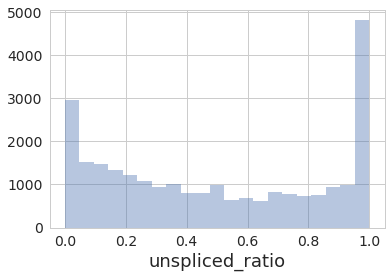

In [124]:
sns.distplot(fc_counts.dropna()['unspliced_ratio'], kde=False)
plt.show()

## Salmon comparison

In [107]:
salmon_grouped = salmon_HepG2.groupby(['gene_id', 'unspliced']).sum()
salmon_grouped = salmon_grouped.reset_index('unspliced')
print(salmon_grouped.index.value_counts().value_counts())
salmon_grouped.head()

2    35484
1    22735
Name: gene_id, dtype: int64


unspliced  Length  EffectiveLength        TPM     NumReads
gene_id                                                                       
ENSG00000000003.14      False    8747         7866.611  61.296581  10749.20140
ENSG00000000003.14       True   12883        12704.000   0.818358    930.83000
ENSG00000000005.5       False    1881         1531.208   0.000000      0.00000
ENSG00000000005.5        True   15084        14905.000   0.037467     50.00000
ENSG00000000419.12      False    5867         4808.258  90.885595   7168.30784

In [108]:
salmon_spliced = salmon_grouped[~salmon_grouped['unspliced']]
salmon_unspliced = salmon_grouped[salmon_grouped['unspliced']]

In [113]:
salmon_counts = salmon_unspliced[['NumReads']]
salmon_counts.columns = ['unspliced']
salmon_counts = salmon_counts.join(salmon_spliced[['NumReads']])
salmon_counts.columns = ['unspliced', 'spliced']
salmon_counts['unspliced_ratio'] = salmon_counts['unspliced'] / (salmon_counts['unspliced'] + salmon_counts['spliced'])
print(salmon_counts.shape)
print('\nNull count:')
print(salmon_counts.isnull().sum())
salmon_counts.head()

(58219, 3)

Null count:
unspliced              0
spliced            22735
unspliced_ratio    33715
dtype: int64


unspliced      spliced  unspliced_ratio
gene_id                                                    
ENSG00000000003.14     930.83  10749.20140         0.079694
ENSG00000000005.5       50.00      0.00000         1.000000
ENSG00000000419.12    2308.94   7168.30784         0.243630
ENSG00000000457.13    1285.80    827.41670         0.608456
ENSG00000000460.16    1599.82   3148.90792         0.336894

In [131]:
print(len(fc_counts.index))
print(sum(fc_counts.index == salmon_counts.index))

58219
58219


In [139]:
ratios_df = fc_counts[['unspliced_ratio']].copy()
ratios_df.columns = ['FeatureCounts']
ratios_df['Salmon'] = salmon_counts['unspliced_ratio'].copy()

ratios_no_na = ratios_df.dropna()

In [141]:
sns.jointplot('FeatureCounts', 'Salmon', ratios_no_na, kind='kde')

In [142]:
ratios_no_na10 = ratios_no_na[ratios_no_na['FeatureCounts'] != 1]
ratios_no_na10 = ratios_no_na10[ratios_no_na10['FeatureCounts'] != 0]
ratios_no_na10 = ratios_no_na10[ratios_no_na10['Salmon'] != 1]
ratios_no_na10 = ratios_no_na10[ratios_no_na10['Salmon'] != 0]
sns.jointplot('FeatureCounts', 'Salmon', ratios_no_na10, kind='kde')

I think we're just going to go with Salmon for now.

# Wetlab

> Jessime - I just re-read the response from Nature Biotech — its asinine. Still, we are a stone’s throw away from giving all of these joker editors what it is that they want. 

> Can you generate the following: A list of all mouse -001 lncRNAs and their unspliced counterparts, with their SEEKR similarity to Xist, unspliced Airn, and Kcnq1ot1?

> We can pick Xist-like lncRNAs that are not expressed in ESCs, generate guide RNAs, and activate their expression endogenously to see if we can cause deposition of K27 in the genome. If you make the list, I can pick the best candidates.

> Mauro

I want to fix these broken names.

In [19]:
infasta = '/home/jessime/Research/M14_unspliced01.fa'
outfasta = '/home/jessime/Research/temp.fa'
with open(infasta) as infasta, open(outfasta, 'w') as outfasta:
    for line in infasta:
        if line[0] == '>':
            line = line.replace('>.(', '>').split('-')[0] + '-un\n'
        outfasta.write(line)

In [20]:
!mv /home/jessime/Research/temp.fa /home/jessime/Research/M14_unspliced01.fa

In [9]:
!cat /home/jessime/Research/indv_seqs/xist_M5.fa \
/home/jessime/Research/indv_seqs/kcnq1ot1_M5.fa \
/home/jessime/Research/indv_seqs/mAirn_88k.fa > \
/home/jessime/Research/indv_seqs/M5_XKA.fa

In [17]:
%aimport kmer_counts

In [22]:
infasta = '/home/jessime/Research/M14_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()

In [24]:
meanfile = '/home/jessime/Research/fa_arrays/M14_6mer_mean.npy'
np.save(meanfile, counter.mean)
stdfile = '/home/jessime/Research/fa_arrays/M14_6mer_std.npy'
np.save(stdfile, counter.std)

In [27]:
infasta_un = '/home/jessime/Research/M14_unspliced01.fa'
counter_un = kmer_counts.BasicCounter(infasta_un, mean=meanfile, std=stdfile)
counter_un.get_counts()

In [28]:
print(counter.counts.shape)
print(counter_un.counts.shape)

(11587, 4096)
(11587, 4096)


In [29]:
infasta_rep = '/home/jessime/Research/indv_seqs/M5_XKA.fa'
counter_rep = kmer_counts.BasicCounter(infasta_rep, mean=meanfile, std=stdfile)
counter_rep.get_counts()

Now to run Pearson.

In [30]:
%aimport pearson

In [32]:
sim = pearson.pearson(np.vstack((counter.counts,
                                 counter_un.counts)),
                      counter_rep.counts)
print(sim.shape)

(23174, 3)


In [34]:
names = '/home/jessime/Research/M14_names.pkl'
names = pickle.load(open(names, 'rb'))
len(names)

11587

In [37]:
infasta = '/home/jessime/Research/M14_unspliced01.fa'
with open(infasta) as infasta:
    names_un = [line.strip().strip('>') for line in infasta.readlines() if line[0] == '>']
names_un[:3]

['4933401J01Rik-un', 'Gm37180-un', 'Gm37363-un']

In [39]:
print(len(names_un))
outfile = '/home/jessime/Research/M14_unspliced01_names.pkl'
pickle.dump(names_un, open(outfile, 'wb'))

11587


In [40]:
sim_df = pd.DataFrame(sim,
                      names+names_un,
                      ['Xist', 'Kcnq1ot1', 'Air'])
sim_df.head()

Xist  Kcnq1ot1       Air
4933401J01Rik-201  0.101435  0.222823  0.012638
Gm37180-201        0.056461  0.204832  0.062352
Gm37363-201        0.055829  0.313758  0.107775
Gm37686-201        0.128484  0.171020  0.039003
Gm1992-201         0.012252  0.068570  0.018277

In [41]:
sim_df.to_csv('/home/jessime/Research/splicing/M14_sim_XKA.csv')

# Nature figs

Nature Genetics wants a couple of tweaks to our figures. 

1. They want error bars on our Tetris scatterplots
2. The want bar charts to be boxplots

In [42]:
tetris_df = '/home/jessime/Research/tetris/tetris_data_R.csv'
tetris_df = pd.read_csv(tetris_df, index_col=0)
del tetris_df['R_value-min']
tetris_dox = tetris_df[tetris_df.Condition == '+Dox']
dox_grouped = tetris_dox.groupby('Sample')
dox_std = dox_grouped.std()
dox_count = dox_grouped.count()

In [50]:
dox_count['Replicates'] = (dox_count['Luciferase']/3).astype(int)
dox_count.head()

Condition  Luciferase  Replicates
Sample                                                      
1700047N06Rik                      6           6           2
1810010K12Rik                      6           6           2
409/7(1.8-5.5k)                   11          11           3
433/434 (repeat A delete)         12          12           4
435/436 (repeat A only)           12          12           4

In [173]:
dox_count.to_csv('/home/jessime/Research/tetris/replicate_count.csv')

In [61]:
luc_all_metrics = '/home/jessime/Research/tetris/luc_all_metrics2.csv'
luc_all_metrics = pd.read_csv(luc_all_metrics, index_col=0)
print(luc_all_metrics.shape)
luc_all_metrics['std'] = dox_std['Luciferase']
print(luc_all_metrics.shape)

to_drop = ['409/7(1.8-5.5k)',
'409/7(1.8-5.5k)',
'433/434 (repeat A delete)',
'435/436 (repeat A only)',
'Xist5.5',
'EGFP',
'Renilla',
'Empty',
'Xist1.8']
luc_all_metrics.drop(to_drop, inplace=True)

luc_syn = luc_all_metrics[luc_all_metrics.index.str.contains('SYN')]

(47, 27)
(47, 28)


In [54]:
plt.style.use('seaborn-whitegrid')
sns.set_palette('colorblind')
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24

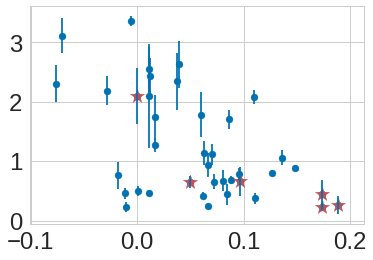

In [65]:
x = luc_all_metrics['R_seg_xist18_6']
y = luc_all_metrics['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn['R_seg_xist18_6'], 
            luc_syn['Luciferase'], 
            color=colors[2], 
            marker='*', 
            s=225)
plt.errorbar(x, y, yerr=luc_all_metrics['std'], linestyle='None')
plt.savefig('/home/jessime/Research/pics/paper/tetris_corr_6mers.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [66]:
x = luc_all_metrics['nhmmer']
y = luc_all_metrics['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn['nhmmer'], 
            luc_syn['Luciferase'], 
            color=colors[2], 
            marker='*', 
            s=225)
plt.errorbar(x, y, yerr=luc_all_metrics['std'], linestyle='None')
plt.savefig('/home/jessime/Research/pics/paper/tetris_corr_nhmmer.pdf', bbox_inches='tight', dpi=600)
plt.show()

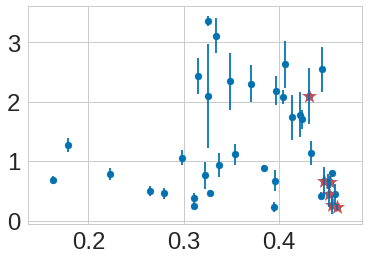

In [67]:
x = luc_all_metrics['Stretcher']
y = luc_all_metrics['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn['Stretcher'], 
            luc_syn['Luciferase'], 
            color=colors[2], 
            marker='*', 
            s=225)
plt.errorbar(x, y, yerr=luc_all_metrics['std'], linestyle='None')
plt.savefig('/home/jessime/Research/pics/paper/tetris_corr_Stretcher.pdf', bbox_inches='tight', dpi=600)
plt.show()

## tetris boxplots

In [71]:
infile = "/home/jessime/Research/tetris/tetris_data_xist3p3.csv"
tetris_df = pd.read_csv(infile, index_col=0)
xist_frag_names = ['Empty',
                   'Xist1.8',
                   '435/436 (repeat A only)',
                   '433/434 (repeat A delete)', 
                   'Xist5.5',
                   '409/7(1.8-5.5k)', 
                   "407/408(3'3kb)",
                   'Hottip']
tetris_xist = tetris_df[tetris_df.Sample.isin(xist_frag_names)].copy()
tetris_xist['Sample'] = tetris_xist['Sample'].astype('category')
tetris_xist['Sample'].cat.set_categories(xist_frag_names, inplace=True)
tetris_xist = tetris_xist.sort_values('Sample')

In [77]:
data = tetris_xist[tetris_xist['Condition'] == '+Dox']
plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', data=data)
ax = sns.swarmplot(x='Sample', y='Luciferase', data=data, color='.25')

tetris_labels = ['Empty', 'Xist-2kb', 'repA', r'repA$\Delta$', 'Xist5.5', 'Xist1.8-5.5', "Xist3'3", 'Hottip']
ax.set_xticklabels(tetris_labels, rotation=90)

plt.savefig('/home/jessime/Research/pics/paper/tetris_xist2.pdf', bbox_inches='tight', dpi=600)

plt.show()

In [89]:
tetris_syn = tetris_df[(tetris_df.Sample.str.contains('SYN'))&
                       (tetris_df.Condition == '+Dox')]
tetris_syn = tetris_syn.iloc[::-1]

In [91]:
plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', data=tetris_syn)
ax = sns.swarmplot(x='Sample', y='Luciferase', data=tetris_syn, color='.25')
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('/home/jessime/Research/pics/paper/tetris_syn3.pdf', bbox_inches='tight', dpi=600)
plt.show()

Let's repeat these including the no-dox, in case that's what we decide to go with.

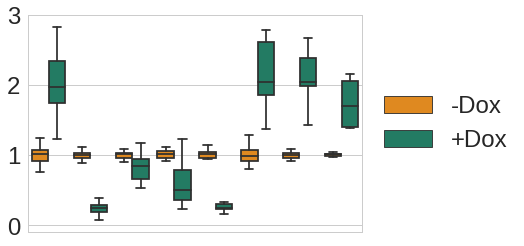

In [241]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_xist,
                 palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'}, fliersize=0)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels([])
plt.xlabel('')
plt.ylabel('')
plt.ylim([-.1, 3])

outfile = '/home/jessime/Research/pics/paper/tetris_xist3.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)

plt.show()

In [242]:
tetris_syn = tetris_df[(tetris_df.Sample.str.contains('SYN'))]
tetris_syn = tetris_syn.iloc[::-1]

plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_syn,
                 palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'},
                 hue_order=['-Dox', '+Dox'], fliersize=0)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim([-.1, 3])

outfile = '/home/jessime/Research/pics/paper/tetris_syn4.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

I've been overwriting versions above, and one of the previous ones was the graph with outliers. But I got the order of dox/no-dox wrong for the synthetics, so I'm redoing that below in a new version.

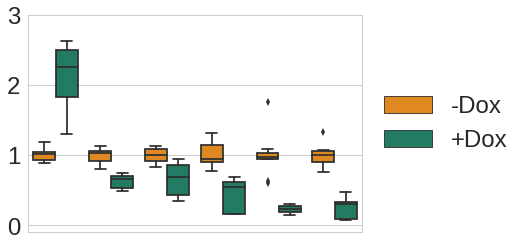

In [278]:
tetris_syn = tetris_df[(tetris_df.Sample.str.contains('SYN'))]
tetris_syn = tetris_syn.iloc[::-1]

plt.locator_params(nbins=6)
ax = sns.boxplot(x='Sample', y='Luciferase', hue='Condition', data=tetris_syn,
                 palette={'+Dox':'#148A6A', '-Dox':'#FF8C00'},
                 hue_order=['-Dox', '+Dox'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim([-.1, 3])

outfile = '/home/jessime/Research/pics/paper/tetris_syn_outliers.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

I also want to make a HSD table for the synthetics.

In [324]:
tetris_syn_dox = tetris_syn[tetris_syn['Condition'] == '+Dox']

tukeyhsd = sm.stats.multicomp.pairwise_tukeyhsd
hsd_test = tukeyhsd(tetris_syn_dox['Luciferase'], tetris_syn_dox['Sample'])
summary = hsd_test.summary()
display(summary)

<class 'statsmodels.iolib.table.SimpleTable'>

In [325]:
outfile = '/home/jessime/Research/tetris/synthetic_tukeyhsd.csv'
with open(outfile, 'w') as outfile:
    outfile.write(summary.as_csv())

## pwm boxplot

This is going to take a bit more work because I don't have the data in the exact form I need it to be. But the transformation shouldn't be too bad.

I have all the grouped weights saved. So now I need to group all of the .csv files of a given protein, as well as all of the columns of enriched/unenriched in each .csv. All of those should go into a single list for the boxplot.

I'll use the (alphabetical) protein order that Mauro has in the paper to minimize rearranging things in illustrator.

I need to build a single dataframe with the following columns:

1. Protein (str): name of protein
2. Enriched (bool) : whether or not the kmer comes from an enriched community
3. Value (float) : The level of kmer enrichment

This might cause problems later if I have to come back to all of this again, but I think it's probably worthwhile:

In [96]:
!mv /home/jessime/Research/proteins/grouped_weights3/7_hnRNPK.csv /home/jessime/Research/proteins/grouped_weights3/7_HNRNPK.csv

In [97]:
proteins = sorted(['SRSF9', 'KHDRBS1', 'HNRNPC', 'SRSF1', 'HNRNPK', 'QKI', 'NONO', 'PTBP1', 'TIA1', 'IGF2BP1', 'SFPQ', 'IGF2BP2', 'PCBP2', 'FXR2', 'IGF2BP3', 'HNRNPA1', 'FXR1'])
print(proteins)

['FXR1', 'FXR2', 'HNRNPA1', 'HNRNPC', 'HNRNPK', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'KHDRBS1', 'NONO', 'PCBP2', 'PTBP1', 'QKI', 'SFPQ', 'SRSF1', 'SRSF9', 'TIA1']


In [161]:
test_df = pd.read_csv('/home/jessime/Research/proteins/grouped_weights3/19_HNRNPC.csv', index_col=0)
test_df.head()

0             1             2             3             4  \
AAAAAA  1.114566e-12 -1.525031e-12 -8.548868e-13 -2.236304e-13  6.615028e-12   
AAAAAG  1.972177e-12 -2.511560e-12 -1.846750e-12 -1.169685e-12  2.891461e-12   
AAAAAT  4.381681e-10 -3.503799e-10 -2.677837e-10 -1.278387e-10  8.128745e-10   
AAAAAC  1.752663e-12 -1.913588e-12 -1.405783e-12 -7.686295e-13  1.613109e-12   
AAAAGA  1.340174e-12 -1.962776e-12 -1.357137e-12 -8.550946e-13  9.563867e-13   

                   5  
AAAAAA -5.171720e-13  
AAAAAG  1.249929e-13  
AAAAAT -9.334880e-11  
AAAAAC  3.768953e-14  
AAAAGA  2.869078e-13

In [165]:
test_df.sum()[[0, 1, 3]].mean()

0.5445928839480302

In [163]:
protein_comm_dict['HNRNPC']

{0, 3, 4}

In [154]:
def flatten_dfs(protein, comms):
    comms = [str(c) for c in comms]
    indir = '/home/jessime/Research/proteins/grouped_weights3/'
    csv_ls = [indir+f for f in listdir(indir) if protein in f]
    temp_df_ls = []
    for csv in csv_ls:
        df = pd.read_csv(csv, index_col=0)
        comm_vals = df.loc[:, df.columns.isin(comms)].stack().values
        not_comm_vals = df.loc[:, ~df.columns.isin(comms)].stack().values
        vals = np.hstack((comm_vals, not_comm_vals))
        df_dict = {'Protein': [protein]*len(vals),
                   'Enriched': [True]*len(comm_vals)+[False]*len(not_comm_vals),
                   'Value': vals}
        temp_df_ls.append(pd.DataFrame.from_dict(df_dict))
    return pd.concat(temp_df_ls)

In [201]:
protein_comm_dict = '/home/jessime/Research/proteins/protein_comm_dict.txt'
protein_comm_dict = pickle.load(open(protein_comm_dict, 'rb'))
df_ls = [flatten_dfs(p, protein_comm_dict[p]) for p in proteins]
df = pd.concat(df_ls)
df_means = df.groupby(['Protein', 'Enriched']).mean()
df_means.to_csv('/home/jessime/Research/proteins/pwm_protein_means.csv')

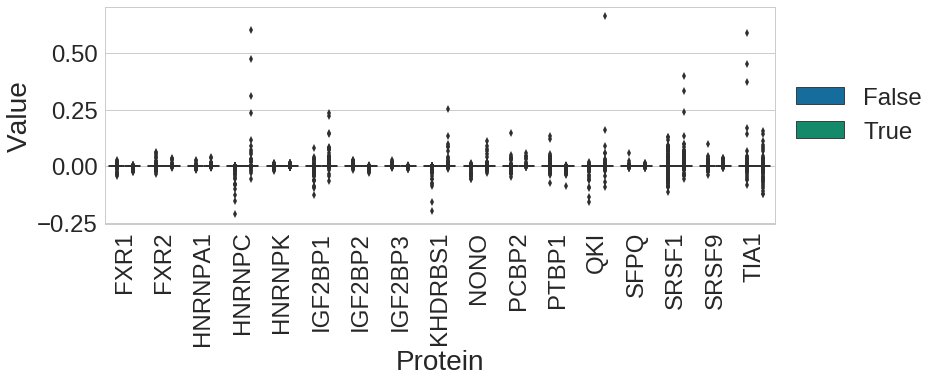

In [199]:
plt.rcParams['figure.figsize'] = [12.0, 4.0]
sns.boxplot('Protein', 'Value', 'Enriched', df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.savefig('/home/jessime/Research/pics/paper/3C-1.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [204]:
plt.rcParams['figure.figsize'] = [12.0, 4.0]
sns.violinplot('Protein', 'Value', 'Enriched', df, split=True,
               palette={True:'#148A6A', False:'#FF8C00'})
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
#plt.savefig('/home/jessime/Research/pics/paper/3C-2.pdf', bbox_inches='tight', dpi=600)
plt.show()

### p-value

I may or may not need to try this multiple ways, but let's start off with a Mann-Whitney U test.

Let's start by making sure that the function can take arrays of different sizes.

In [206]:
mannwhitneyu(np.arange(10), np.random.randint(0, 10, 15))

MannwhitneyuResult(statistic=73.5, pvalue=0.47770135545994885)

Okay, let's test HNRNPC, since it's an upper bound.

In [252]:
hnrnpc_df = df[df['Protein'] == 'HNRNPC']
hnrnpc_enriched = hnrnpc_df[hnrnpc_df['Enriched']]
hnrnpc_un = hnrnpc_df[~hnrnpc_df['Enriched']]
print(hnrnpc_enriched.shape)
print(hnrnpc_un.shape)
print(mannwhitneyu(hnrnpc_enriched['Value'], hnrnpc_un['Value'], alternative='less'))
print(mannwhitneyu(hnrnpc_enriched['Value'], hnrnpc_un['Value'], alternative='greater'))

(12288, 3)
(12288, 3)
MannwhitneyuResult(statistic=70719973.0, pvalue=4.3094265763642891e-18)
MannwhitneyuResult(statistic=70719973.0, pvalue=1.0)


In [279]:
hnrnpc_enriched.sort_values('Value').head()

Enriched Protein     Value
2048       True  HNRNPC -0.056541
8189       True  HNRNPC -0.031033
11264      True  HNRNPC -0.022679
8195       True  HNRNPC -0.015091
5120       True  HNRNPC -0.006112

In [280]:
hnrnpc_un.sort_values('Value').head()

Enriched Protein     Value
14334     False  HNRNPC -0.210489
14335     False  HNRNPC -0.152264
20478     False  HNRNPC -0.126285
14336     False  HNRNPC -0.100296
20480     False  HNRNPC -0.083605

DescribeResult(nobs=12288, minmax=(-0.056540549412432764, 0.60049411955057519), mean=0.00016803472402424362, variance=6.3224612277777283e-05, skewness=59.51153339170902, kurtosis=3916.7229005038685)


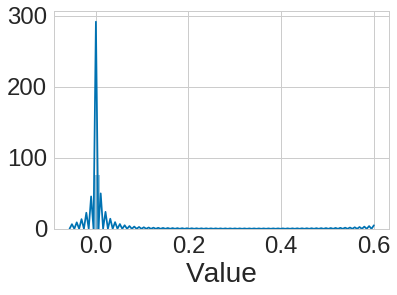

In [259]:
print(describe(hnrnpc_enriched['Value']))
sns.distplot(hnrnpc_enriched['Value'])
plt.show()

DescribeResult(nobs=12288, minmax=(-0.21048893297922941, 0.00022843508366989941), mean=-0.00010280107143225531, variance=1.0150161979934631e-05, skewness=-44.99020520824677, kurtosis=2362.539532826018)


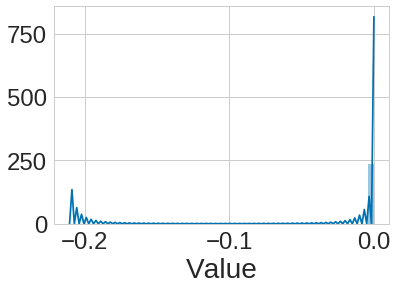

In [260]:
print(describe(hnrnpc_un['Value']))
sns.distplot(hnrnpc_un['Value'])
plt.show()

In [263]:
hnrnpc_enriched['Value'].sort_values().tail()

8190    0.115617
8188    0.233343
2046    0.309378
2047    0.473545
8191    0.600494
Name: Value, dtype: float64

In [264]:
hnrnpc_un['Value'].sort_values().head()

14334   -0.210489
14335   -0.152264
20478   -0.126285
14336   -0.100296
20480   -0.083605
Name: Value, dtype: float64

In [275]:
print(mannwhitneyu(hnrnpc_enriched['Value'].sort_values().tail(11000), hnrnpc_un['Value'].sort_values().head(12000), alternative='greater'))

MannwhitneyuResult(statistic=69246107.0, pvalue=5.4660073655005241e-11)


DescribeResult(nobs=2000, minmax=(-0.022679047097851488, 0.072042118600569929), mean=5.2263295476128202e-05, variance=4.2751108011525985e-06, skewness=29.021085674907106, kurtosis=960.6647501159575)


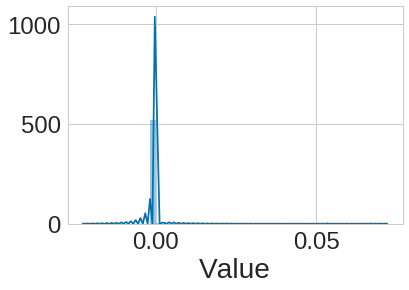

DescribeResult(nobs=2000, minmax=(-0.05020506460969671, 0.00011374162906489839), mean=-5.1262664332957709e-05, variance=1.8930767729996873e-06, skewness=-31.413667406370465, kurtosis=1043.0186261954707)


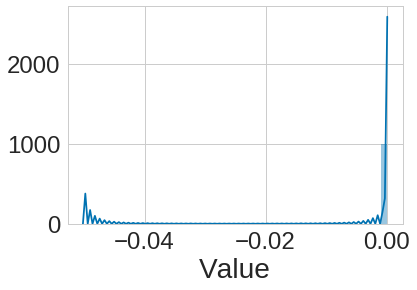

In [276]:
print(describe(hnrnpc_enriched['Value'].tail(2000)))
sns.distplot(hnrnpc_enriched['Value'].tail(2000))
plt.show()

print(describe(hnrnpc_un['Value'].tail(2000)))
sns.distplot(hnrnpc_un['Value'].tail(2000))
plt.show()

Now to do all of them:

In [224]:
p_values = []

for p in proteins:
    protein_df = df[df['Protein'] == p]
    enriched = protein_df[protein_df['Enriched']]['Value']
    unenriched = protein_df[~protein_df['Enriched']]['Value']
    p_values.append(mannwhitneyu(enriched, unenriched, alternative='greater')[1])
    
p_values = pd.DataFrame(p_values, proteins, ['p_value'])
p_values

p_value
FXR1     1.000000e+00
FXR2     5.019854e-26
HNRNPA1  1.000000e+00
HNRNPC   1.000000e+00
HNRNPK   2.267982e-02
IGF2BP1  1.618427e-23
IGF2BP2  9.998419e-01
IGF2BP3  1.000000e+00
KHDRBS1  2.072536e-11
NONO     2.124997e-03
PCBP2    1.577469e-20
PTBP1    3.904772e-01
QKI      1.000000e+00
SFPQ     1.568299e-20
SRSF1    9.059116e-65
SRSF9    4.209716e-99
TIA1     7.127070e-16

In [223]:
p_values.loc['IGF2BP2']

p_value    0.000158
Name: IGF2BP2, dtype: float64

In [249]:
a = list(range(50, 60))
b = list(range(-5, 5))

data = []
for start in range(-80, 80, 10):
    mwu = mannwhitneyu(a, list(range(start, start+10)))[1]
    mwug = mannwhitneyu(a, list(range(start, start+10)), alternative='greater')[1]
    mwul = mannwhitneyu(a, list(range(start, start+10)), alternative='less')[1]
    data.append((start, mwu, mwug, mwul))
    
pd.DataFrame(data, columns=['start', 'mwu', 'greater', 'less'])

start       mwu   greater      less
0     -80  0.000091  0.000091  0.999933
1     -70  0.000091  0.000091  0.999933
2     -60  0.000091  0.000091  0.999933
3     -50  0.000091  0.000091  0.999933
4     -40  0.000091  0.000091  0.999933
5     -30  0.000091  0.000091  0.999933
6     -20  0.000091  0.000091  0.999933
7     -10  0.000091  0.000091  0.999933
8       0  0.000091  0.000091  0.999933
9      10  0.000091  0.000091  0.999933
10     20  0.000091  0.000091  0.999933
11     30  0.000091  0.000091  0.999933
12     40  0.000091  0.000091  0.999933
13     50  0.484868  0.515132  0.515132
14     60  0.000091  0.999933  0.000091
15     70  0.000091  0.999933  0.000091

#### permutation test

Because I can't figure out the MWU. Let's test with HNRNPC again:

In [284]:
hnrnpc_sum = hnrnpc_df.groupby('Enriched').sum()
hnrnpc_sum

Value
Enriched          
False    -1.263220
True      2.064811

How big is this separation?

In [295]:
real_hnrncp = (hnrnpc_sum.loc[True] - hnrnpc_sum.loc[False])['Value']
real_hnrncp

3.3280302545694669

If I randomly shuffle the values, what is the likelihood that I see a value that is greater than 3.3?

In [292]:
def rand_hnrnpc_diff_sum():
    hnrnpc_rand = hnrnpc_df.copy()
    hnrnpc_rand_vals = hnrnpc_rand['Value'].values
    np.random.shuffle(hnrnpc_rand_vals)
    hnrnpc_rand['Value'] = hnrnpc_rand_vals
    hnrnpc_rand_sum = hnrnpc_rand.groupby('Enriched').sum()
    return (hnrnpc_rand_sum.loc[True] - hnrnpc_rand_sum.loc[False])['Value']

In [300]:
rand_hnrnpc_ls = sum(rand_hnrnpc_diff_sum() > real_hnrncp for i in range(10000))
rand_hnrnpc_ls

0

In [301]:
1/10000

0.0001

I'm feeling good about this, but I was at this point with the MWU as well. The real question is if it will track properly across all of the proteins.

Let's generalize the function, test on 1 or 2 more proteins, then run them all.

In [315]:
def rand_sum_diff(df):
    df_rand = df.copy()
    df_rand_vals = df_rand['Value'].values
    np.random.shuffle(df_rand_vals)
    df_rand['Value'] = df_rand_vals
    df_rand_sum = df_rand.groupby('Enriched').sum()
    return (df_rand_sum.loc[True] - df_rand_sum.loc[False])['Value']

def real_sum_diff(df):
    df_sum = df.groupby('Enriched').sum()
    return (df_sum.loc[True] - df_sum.loc[False])['Value']

def get_pval10000(df):
    real = real_sum_diff(df)
    total = sum(rand_sum_diff(df) > real for i in range(10000))
    return total/10000

FXR1 should be close to 1.

In [316]:
get_pval10000(df[df['Protein'] == 'FXR1'])

0.99880000000000002

SFPQ should probably not be significant, though, it might be close.

In [317]:
get_pval10000(df[df['Protein'] == 'SFPQ'])

0.1462

So far, this is great. Let's run them all

In [ ]:
perm_pvals = [get_pval10000(df[df['Protein'] == p]) for p in proteins]

perm_pvals = pd.DataFrame(perm_pvals, proteins, ['p_value'])
perm_pvals

In [320]:
perm_pvals['Adjusted p_value'] = perm_pvals['p_value']*17
perm_pvals

p_value  Adjusted p_value
FXR1      0.9988           16.9796
FXR2      0.0059            0.1003
HNRNPA1   0.0001            0.0017
HNRNPC    0.0000            0.0000
HNRNPK    0.0043            0.0731
IGF2BP1   0.0000            0.0000
IGF2BP2   1.0000           17.0000
IGF2BP3   1.0000           17.0000
KHDRBS1   0.0000            0.0000
NONO      0.0000            0.0000
PCBP2     0.0000            0.0000
PTBP1     1.0000           17.0000
QKI       0.0000            0.0000
SFPQ      0.1418            2.4106
SRSF1     0.0000            0.0000
SRSF9     0.0000            0.0000
TIA1      0.9756           16.5852

## homolog signals

In [166]:
sns.set_palette('colorblind')

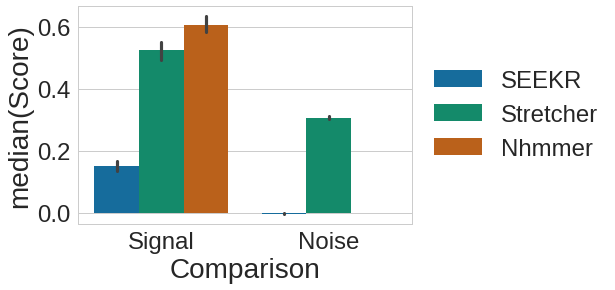

In [168]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]

homologs = pd.read_csv('/home/jessime/Research/fig_data/homologs.csv', index_col=0)
sns.barplot(y='Score', x='Comparison', hue='Metric', data=homologs, estimator=np.median)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

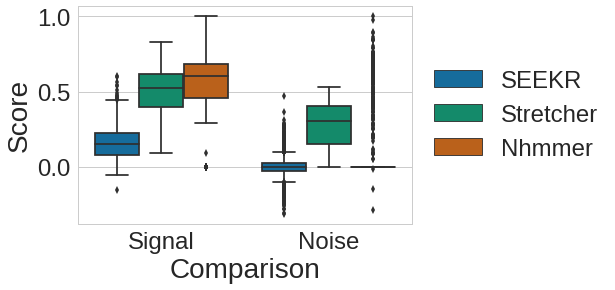

In [170]:
sns.boxplot(y='Score', x='Comparison', hue='Metric', data=homologs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('/home/jessime/Research/pics/paper/similarities_top2.pdf', bbox_inches='tight', dpi=600)
plt.show()

## tetris frags

In [172]:
frag_table = '/home/jessime/Research/tetris/tetris-frag-table.xlsx'
frag_table = pd.read_excel(frag_table, index_col=0)
frag_table.head()

cloned fragment spliced  \
ID                                                                         
1700047N06rik  AACAGTGGTGCCTTCCTCTGGGACCAGCTTTCCCAAGCTGGAAATA...       n   
1700086L19Rik  GTTCTGAGCCGGAGCGAGAGGCGCTTCAGAGAAGGAGGGACCGACC...       y   
1810010K12Rik  CCTGCTCCATTTCAACCATTGTGTGCTTTGGGAGAATAATTAAGTT...       n   
493057O11Rik   CTCCTAAGAATCTAAGCAAAATAGAGTTGGAACAGGTAAATAACAT...       n   
5730488B01Rik  TAGGGACCCTGACTTCGTTGATTCTTTAAATCCCCTCTCCTCGATC...       n   

              mm10_chr  mm10_start    mm10_end strand  rel. luc.     SEEKR  \
ID                                                                           
1700047N06rik        1  10056969.0  10057963.0      -   3.107935 -0.070944   
1700086L19Rik       12  74284276.0  74295938.0      +   0.456968 -0.011457   
1810010K12Rik        2  19451806.0  19453154.0      +   2.072199  0.109939   
493057O11Rik         8  81665775.0  81667100.0      -   2.183471 -0.028118   
5730488B01Rik        4  44702820.0  44705230.0      +   1.137146  0.053491   

               nhmmer  Stretcher  
ID                                
1700047N06rik     0.0   0.333663  
1700086L19Rik     0.0   0.279703  
1810010K12Rik     0.0   0.404455  
493057O11Rik      0.0   0.397132  
5730488B01Rik     0.0   0.433347

In [177]:
infile = "/home/jessime/Research/tetris/tetris_data_xist3p3.csv"
tetris_df = pd.read_csv(infile, index_col=0)
tetris_df_dox = tetris_df[tetris_df['Condition'] == '+Dox']
tetris_df_dox.head()

Sample Condition  Luciferase
0       K1      +Dox    0.282079
1       K1      +Dox    0.348051
2       K1      +Dox    0.375287
6  pCL 170      +Dox    1.158379
7  pCL 170      +Dox    1.174985

Mauro has changed a lot of these sample names in his excel file. I'm going to use a hack and make the luciferase mean values my keys (doing things manually in excel).

In [184]:
tetris_df_dox_count = tetris_df_dox.groupby('Sample').count()
tetris_df_dox_mean = tetris_df_dox.groupby('Sample').mean()
tetris_df_dox_mean['Assays'] = tetris_df_dox_count['Luciferase']
tetris_df_dox_mean['Replicates'] = (round(tetris_df_dox_count['Luciferase']/3)).astype(int)
print(tetris_df_dox_mean.shape)
tetris_df_dox_mean.head()

(48, 3)


Luciferase  Assays  Replicates
Sample                                                   
1700047N06Rik                3.107935       6           2
1810010K12Rik                2.072199       6           2
407/408(3'3kb)               2.129646       8           3
409/7(1.8-5.5k)              2.274331      11           4
433/434 (repeat A delete)    0.610206      12           4

In [185]:
tetris_df_dox_mean.to_csv('/home/jessime/Research/tetris/replicate_count2.csv')

In [326]:
tetris_df_dox_std = tetris_df_dox.groupby('Sample').std()
print(tetris_df_dox_mean.loc['Empty'])
print(tetris_df_dox_std.loc['Empty'])

Luciferase     2.029204
Assays        29.000000
Replicates    10.000000
Name: Empty, dtype: float64
Luciferase    0.504292
Name: Empty, dtype: float64


ModuleNotFoundError: No module named 'louvain'